<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/%EC%96%91%EC%9E%90%ED%9A%8C%EB%A1%9CVisualization%EB%B0%A9%EB%B2%95%EB%93%A4_20240412.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python3 -m pip install qiskit[visualization]
!python3 -m pip install qiskit-ionq
!python3 -m pip install qiskit-ibm-provider
!python3 -m pip install qiskit-aer
!python3 -m pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 6.9 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=f9e53487232d70099fee0ed8d730b69d5ddaae77e129044d51f03d1e692caea2
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 7.8 MB/s eta 0:00:00
  Attempting unin

In [2]:
# 참조: https://github.com/Qiskit/qiskit-ibm-provider/blob/main/docs/tutorials/1_the_ibm_quantum_account.ipynb
# IBMQ Cloud 서비스 사용하기 위한 준비
from qiskit_ibm_provider import IBMProvider

# IBM  Provider에 등록된 계정 정보를 입력합니다.
IBMProvider.save_account(token='91762dc4c1496e27006d7b6b7f49eead26c56a0d0779ea686790b6e790efaf08f934614b06a7e551fad25b3e0f9373510dd14777bdae565133048b4db983cb4b',overwrite=True)

# IBM Provider로 접속합니다.
ibm_provider = IBMProvider()

# 양자회로를 수행한 양자컴퓨터 백엔드 리스트 출력
#print(ibm_provider.backends())
print("Available backends:")

for backend in ibm_provider.backends():
  print(backend.name)
###for

RequestsApiError: '401 Client Error: Unauthorized for url: https://auth.quantum-computing.ibm.com/api/users/loginWithToken. Login failed., Error code: 3446.'

In [ ]:
# IonQ H/W Cloud를 사용하기 위한 준비
from qiskit_ionq import IonQProvider

# IonQ Cloud 서비스 사용하기 위한 준비
ionq_provider = IonQProvider("BfclEvBY5nVQbPlAMG2dYbqaUbsZIc01") #IonQ Cloud에서 Access Key를 복사해 넣어야 합니다.

# 백엔드 리스트 출력
print("Available backends:")

for backend in ionq_provider.backends():
  print(backend.name())
###for

In [3]:
# Qiskit Local Simulator 사용하기 위한 준비
from qiskit_aer import Aer

In [4]:
from qiskit import *
from qiskit.visualization import plot_histogram

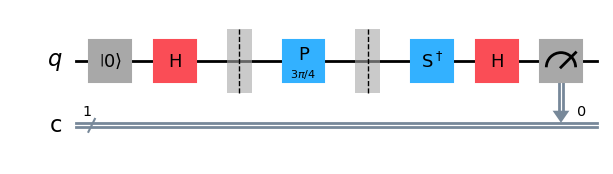

In [7]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from numpy import pi

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0])
circuit.p(3 * pi / 4, qreg_q[0])
circuit.barrier(qreg_q[0])
circuit.sdg(qreg_q[0])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])
circuit.draw('mpl')

In [8]:
# execute the quantum circuit
backend = Aer.get_backend(name='qasm_simulator') # the device to run on
circuit = circuit.compose(other=circuit)
result = backend.run(circuits=circuit, shots=1024).result()
counts = result.get_counts(experiment=circuit)
print(counts)

{'1': 143, '0': 881}


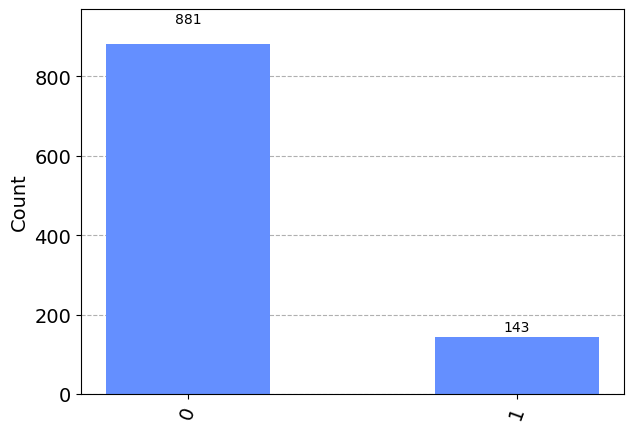

In [9]:
plot_histogram(data=counts)


In [10]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

In [11]:
# execute the quantum circuit
backend = Aer.get_backend(name='statevector_simulator') # the device to run on
result = backend.run(circuit).result()
psi = result.get_statevector(experiment=circuit)

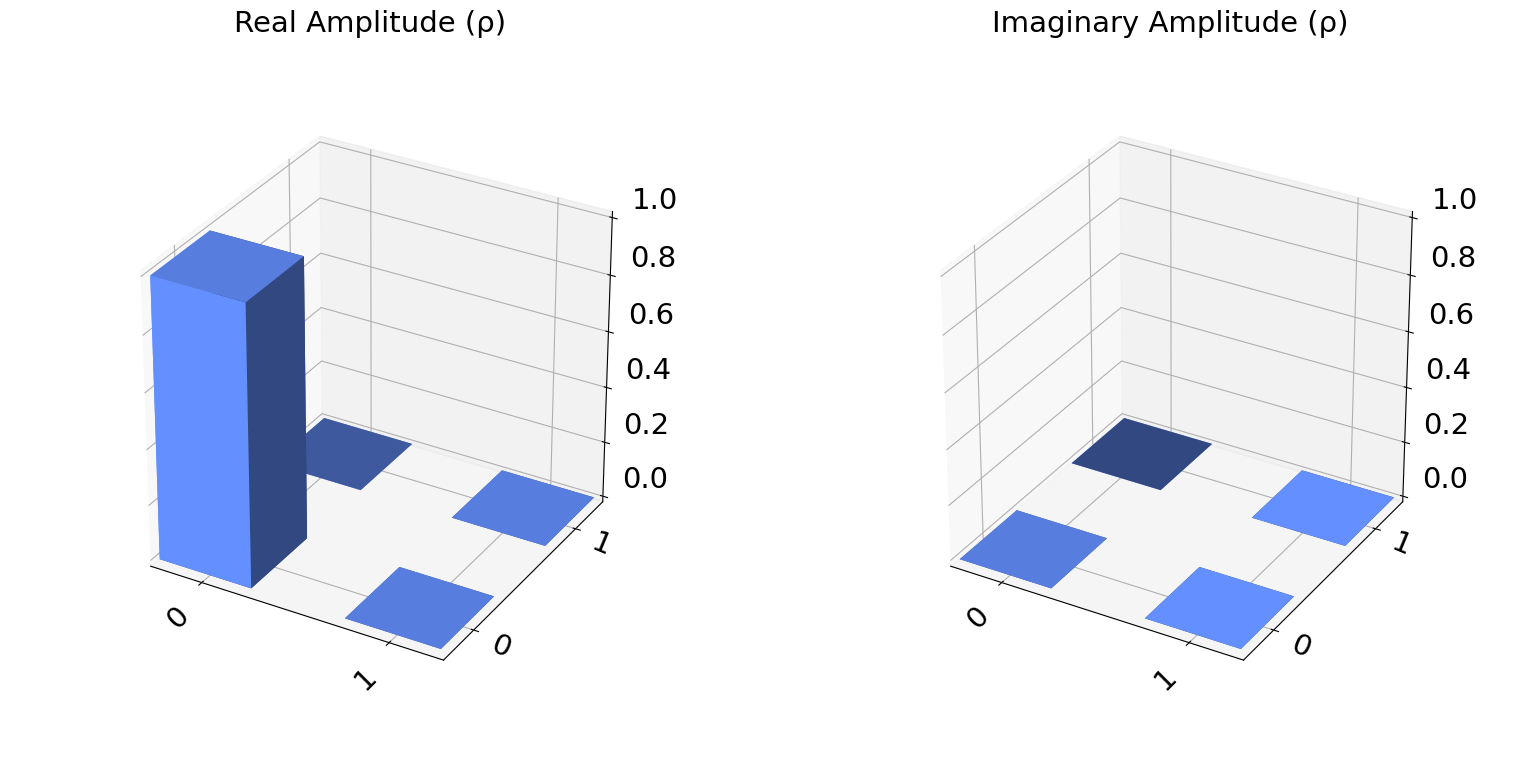

In [12]:
plot_state_city(state=psi)


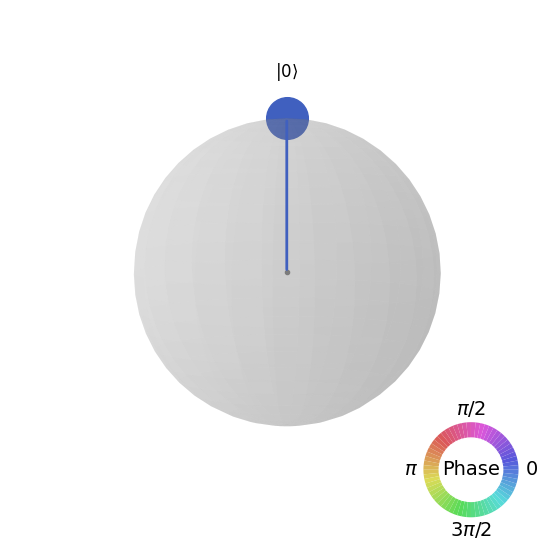

In [13]:
plot_state_qsphere(state=psi)

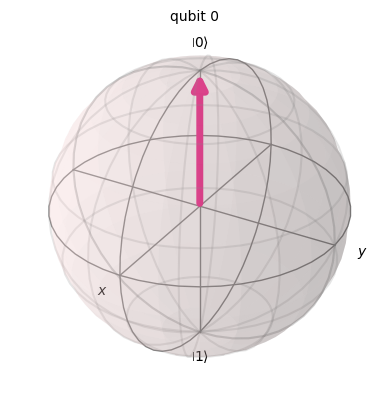

In [14]:
plot_bloch_multivector(state=psi)

In [ ]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

from qiskit.visualization import visualize_transition
visualize_transition(qc)
#20초 정도 걸려요


In [ ]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(1)
qc.h(0)
qc.draw('mpl')

from qiskit.visualization import visualize_transition
visualize_transition(qc)
#20초 정도 걸려요

In [ ]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
qc.draw('mpl')

from qiskit.visualization import visualize_transition
visualize_transition(qc)
#20초 정도 걸려요

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

#circuit.reset(qreg_q[0])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0])
#circuit.p(3 * pi / 4, qreg_q[0])
circuit.barrier(qreg_q[0])
circuit.sdg(qreg_q[0])
circuit.h(qreg_q[0])
#circuit.measure(qreg_q[0], creg_c[0])

In [ ]:
circuit.draw('mpl')

In [ ]:
# execute the quantum circuit
backend = Aer.get_backend(name='statevector_simulator') # the device to run on
result = backend.run(circuit).result()
psi = result.get_statevector(experiment=circuit)

In [ ]:
plot_bloch_multivector(state=psi)

In [ ]:
plot_state_city(state=psi)

In [ ]:
from qiskit.visualization import visualize_transition
visualize_transition(circuit)

In [18]:
from qiskit_aer import Aer
from qiskit import QuantumCircuit
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_textbook.tools import array_to_latex

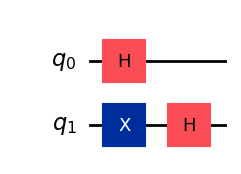

In [19]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.draw('mpl')

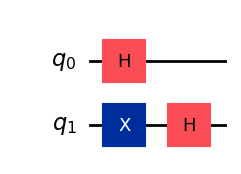

<IPython.core.display.Math object>

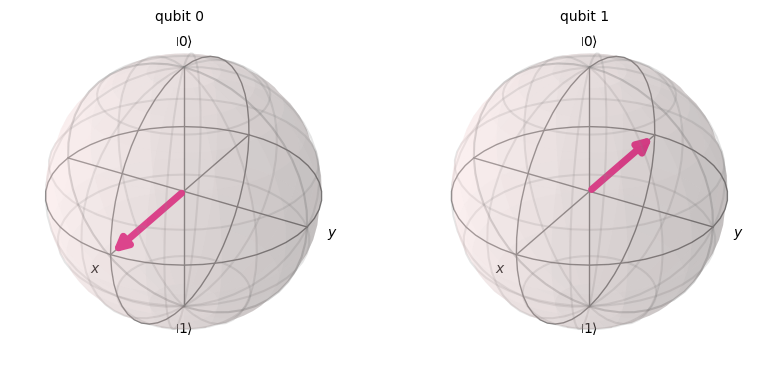

In [20]:
statevector_backend = Aer.get_backend('statevector_simulator')
final_state = statevector_backend.run(qc, shots=1024).result().get_statevector()

display(qc.draw('mpl'))
print("\n")
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)
print("\n")
plot_bloch_multivector(final_state)

In [21]:
from math import sqrt, pi

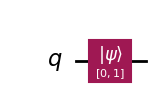

In [22]:
qc = QuantumCircuit(1)
initial_state = [0, 1]
qc.initialize(initial_state, 0)
qc.draw('mpl')

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))




<IPython.core.display.Math object>

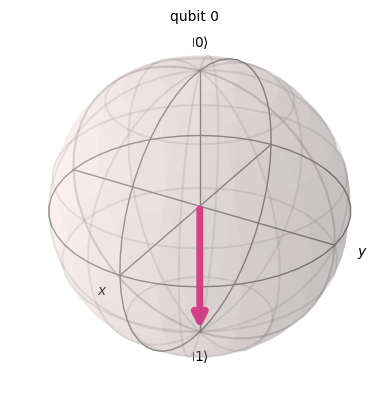

In [23]:
backend = Aer.get_backend('statevector_simulator')
result = backend.run(qc, shot=1024).result()
out_state = result.get_statevector()
print(out_state)

#display(qc.draw('mpl'))
print("\n")
array_to_latex(out_state, pretext="\\text{Statevector} = ", precision=1)
print("\n")
plot_bloch_multivector(out_state)

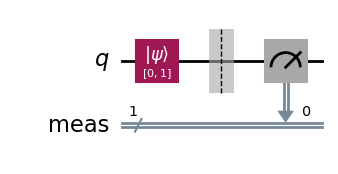

In [24]:
qc.measure_all()
qc.draw('mpl')

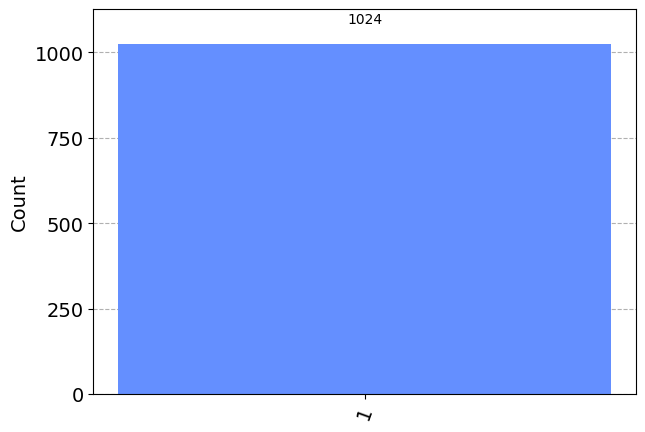

In [25]:
result = backend.run(qc, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

**정규화** *Normalization*

In [26]:
from qiskit_textbook.widgets import state_vector_exercise
state_vector_exercise(target=1/3)

HTML(value='<pre></pre>')

**전역위상** *Global Phase*

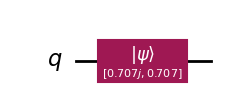

In [27]:
qc = QuantumCircuit(1)
initial_state = [0.+1.j/sqrt(2), 1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.draw('mpl')

Qubit State: Statevector([0.        +0.70710678j, 0.70710678+0.j        ],
            dims=(2,))




<IPython.core.display.Math object>

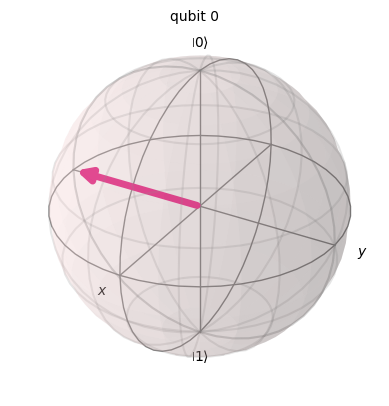

In [28]:
out_state = backend.run(qc, shots=1024).result().get_statevector()
print("Qubit State: " + str(out_state))

#display(qc.draw('mpl'))
print("\n")
array_to_latex(out_state, pretext="\\text{Statevector} = ", precision=1)
print("\n")
plot_bloch_multivector(out_state)

큐빗의 시각적 표현

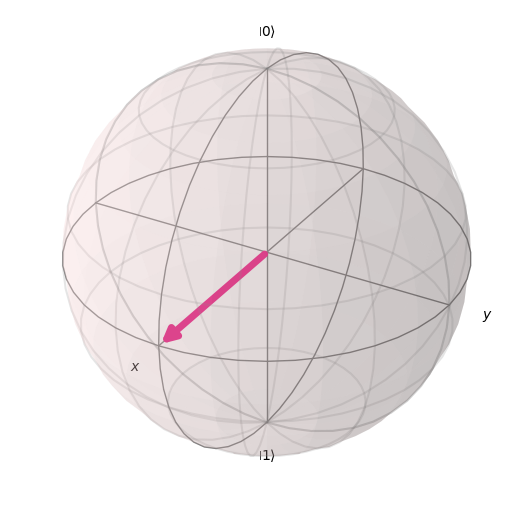

In [29]:
from math import pi
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([1,pi/2,0], coord_type='spherical')

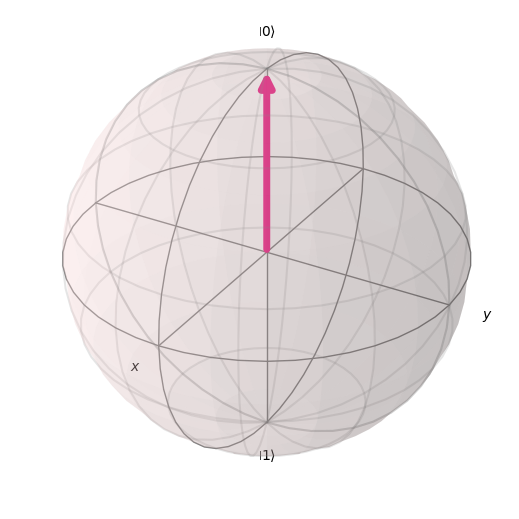

In [30]:
from math import pi
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([1,0,0], coord_type='spherical')

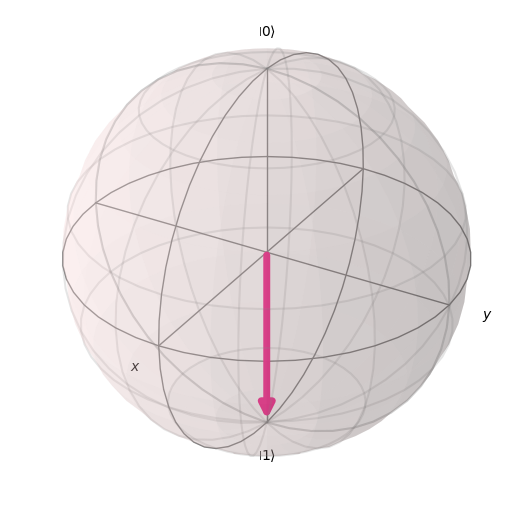

In [31]:
from math import pi
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([1,pi,0], coord_type='spherical')

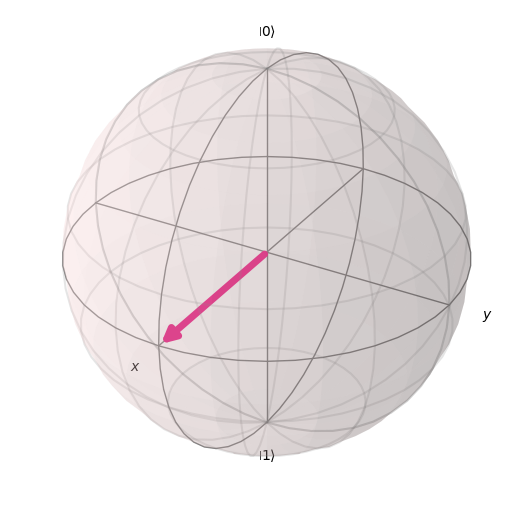

In [65]:
from math import pi
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([1, pi/2,0], coord_type='spherical')

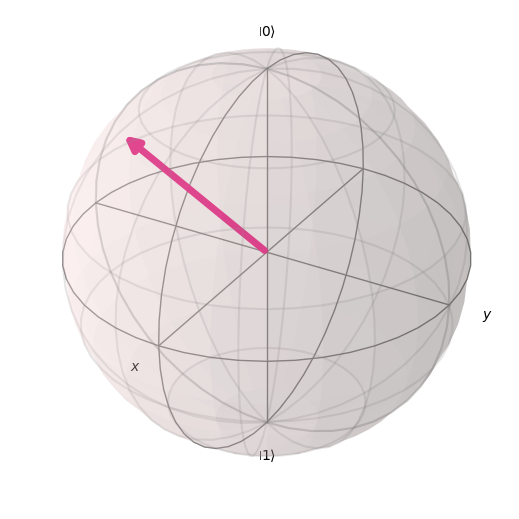

In [93]:
import numpy as np
from qiskit.visualization import plot_bloch_vector

# 블로흐 벡터 생성
#([X, Y, Z])
bloch_vector = np.array([0.5, -0.5, 0.75])

# 블로흐 벡터 표현
plot_bloch_vector(bloch_vector)


   ┌─────────────────────────────┐
q: ┤ Initialize(0.70711,0.70711) ├
   └─────────────────────────────┘


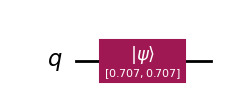

In [72]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit.library import Initialize

# 초기화할 상태를 정의합니다.
desired_vector = [1 / np.sqrt(2), 1 / np.sqrt(2)]

# Initialize 객체를 생성합니다.
init_gate = Initialize(desired_vector)

# 양자 회로를 생성하고 초기화 게이트를 추가합니다.
qc = QuantumCircuit(1)  # 1개의 양자 비트로 양자 회로를 생성합니다.
qc.append(init_gate, [0])  # 초기화 게이트를 양자 회로에 추가합니다.

# 양자 회로를 그립니다.
print(qc)
qc.draw('mpl')
